In [1]:
from api_lib import *
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import pandas as pd

%matplotlib inline

In [2]:
data = read_json('orders.json')

In [3]:
def extract_data(parameter, data = data):
    extracted_data = []
    for i in range(len(data)):
        extracted_data.append(data[i][parameter])
    return extracted_data

In [4]:
data[1]['buyer_user_id']

108035722

In [5]:
# Number of orders per customer / Repeat vs single orders
buyer_user_id = extract_data("buyer_user_id")

# Time between orders

# Geolocation
address = extract_data('first_line')
city = extract_data('city')
state = extract_data('state')
zipcode = extract_data('zip')
country = extract_data('country_iso')

# Order size

# What products sell best - where
#product_id = extract_data('product_id')



# Number of orders per customers

([<matplotlib.patches.Wedge at 0x1621fbdd0>,
 [Text(-1.020763633754268, 0.4099287791858271, '1'),
  Text(0.8421629607175984, -0.7076450717664674, '3'),
  Text(0.8982403806541042, -0.6349521387965948, '4'),
  Text(1.0446809358558327, -0.34444410614696513, '2'),
  Text(1.0992428476725984, -0.040806394604731566, '6'),
  Text(1.0997778333214716, -0.022106952180916708, '5'),
  Text(1.099988169008568, -0.005101768436359702, '36'),
  Text(1.099998685658905, -0.0017004554335559598, '8')],
 [Text(-0.5567801638659643, 0.22359751591954202, '87.8%'),
  Text(0.45936161493687183, -0.38598822096352764, '2.1%'),
  Text(0.4899492985386022, -0.3463375302526881, '0.6%'),
  Text(0.5698259650122723, -0.18787860335289006, '8.9%'),
  Text(0.5995870078214172, -0.022258033420762668, '0.1%'),
  Text(0.5998788181753482, -0.012058337553227294, '0.4%'),
  Text(0.5999935467319462, -0.0027827827834689283, '0.0%'),
  Text(0.5999992830866754, -0.0009275211455759779, '0.0%')])

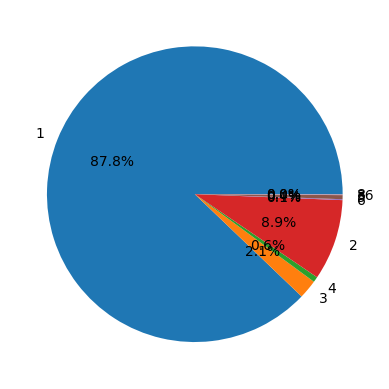

In [6]:
orders_per_customer = Counter(Counter(buyer_user_id).values())
orders_per_customer

labels = orders_per_customer.keys()
sizes = orders_per_customer.values()


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Repeat orders vs single orders

([<matplotlib.patches.Wedge at 0x16223a790>,
 [Text(0.9979762902890555, 0.4626481643980608, 'Repeat Orders'),
  Text(-0.9979762686309308, -0.4626482111167019, 'Single Orders')],
 [Text(0.5443507037940303, 0.252353544217124, '13.8%'),
  Text(-0.5443506919805077, -0.2523535697000192, '86.2%')])

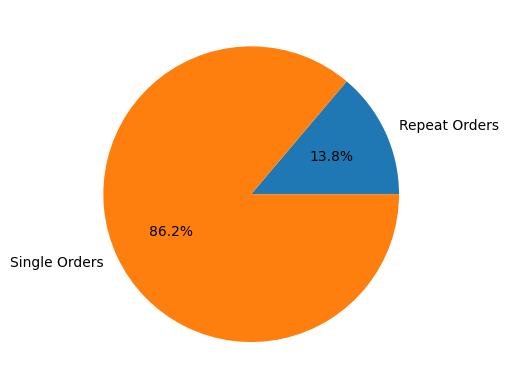

In [7]:
already_assessed = []
repeat_orders = 0
for id in buyer_user_id:
    if id in already_assessed:
        repeat_orders += 1
    already_assessed.append(id)


sizes = [repeat_orders, len(buyer_user_id)]
labels = ["Repeat Orders", "Single Orders"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Geolocation

In [15]:
import pycountry_convert

country_list = Counter(country)
country_list = pd.DataFrame.from_dict(country_list, orient='index').reset_index()
country_list = country_list.rename(columns={"index":"country", 0:"number_of_orders"})
country_list['country'] = country_list.country.apply(lambda x: pycountry_convert.country_name_to_country_alpha3(pycountry_convert.country_alpha2_to_country_name(x)))

In [14]:
fig = px.scatter_geo(country_list, locations="country", size="number_of_orders",
                     projection="natural earth")
fig.show()